## WEEK 12 IN-LAB CODING EXERCISES - STUDENTS 

#### Let's continue to explore data collected on earthquakes of magnitude > 4.5 that occurred globally from 1 Sept 2024 through 1 Sept 2025- you downloaded and did analysis on this data on your Week 6 and 7 Assignments (but I included it again for your convenience)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

####  Read in data into a Pandas DataFrame called 'earth' 

In [3]:
earth = pd.read_csv('query_0924_0925.csv',usecols=['time','latitude','longitude','depth','mag','place'])
earth

,time,latitude,longitude,depth,mag,place
0,2025-08-31T23:46:27.869Z,34.7164,70.7355,8.457,5.2,"41 km NE of Jalālābād, Afghanistan"
1,2025-08-31T23:04:27.436Z,-8.1787,107.4313,10.000,4.5,"108 km S of Banjar, Indonesia"
2,2025-08-31T21:41:06.604Z,34.7560,70.6969,10.000,4.5,"42 km NNE of Jalālābād, Afghanistan"
3,2025-08-31T21:39:55.643Z,11.8039,141.3984,35.000,4.5,"245 km NNE of Fais, Micronesia"
4,2025-08-31T21:33:20.052Z,34.7363,70.7649,10.000,5.2,"38 km WSW of Asadābād, Afghanistan"
...,...,...,...,...,...,...
7868,2024-09-01T03:42:49.557Z,8.1965,91.7229,10.000,5.2,"Nicobar Islands, India region"
7869,2024-09-01T02:28:41.780Z,35.5031,138.9388,37.932,4.6,"8 km ENE of Oshino, Japan"
7870,2024-09-01T01:55:06.334Z,-10.4092,66.4220,10.000,4.6,Mid-Indian Ridge
7871,2024-09-01T00:53:14.857Z,-57.9294,-25.6883,39.749,5.4,South Sandwich Islands region


In [4]:
# What country had the most earthquakes during this time period?

# I am creating a new 'country' column of the dataframe for you to use
earth["country"] = earth["place"].str.split(",").str[-1].str.strip() # Pulls the last part of the place for each row, after the comma
                                                                     # If no comma, full place string for that row
                                                                     # Very rough but quick way to get countries out for most records

earth


,time,latitude,longitude,depth,mag,place,country
0,2025-08-31T23:46:27.869Z,34.7164,70.7355,8.457,5.2,"41 km NE of Jalālābād, Afghanistan",Afghanistan
1,2025-08-31T23:04:27.436Z,-8.1787,107.4313,10.000,4.5,"108 km S of Banjar, Indonesia",Indonesia
2,2025-08-31T21:41:06.604Z,34.7560,70.6969,10.000,4.5,"42 km NNE of Jalālābād, Afghanistan",Afghanistan
3,2025-08-31T21:39:55.643Z,11.8039,141.3984,35.000,4.5,"245 km NNE of Fais, Micronesia",Micronesia
4,2025-08-31T21:33:20.052Z,34.7363,70.7649,10.000,5.2,"38 km WSW of Asadābād, Afghanistan",Afghanistan
...,...,...,...,...,...,...,...
7868,2024-09-01T03:42:49.557Z,8.1965,91.7229,10.000,5.2,"Nicobar Islands, India region",India region
7869,2024-09-01T02:28:41.780Z,35.5031,138.9388,37.932,4.6,"8 km ENE of Oshino, Japan",Japan
7870,2024-09-01T01:55:06.334Z,-10.4092,66.4220,10.000,4.6,Mid-Indian Ridge,Mid-Indian Ridge
7871,2024-09-01T00:53:14.857Z,-57.9294,-25.6883,39.749,5.4,South Sandwich Islands region,South Sandwich Islands region


In [8]:
# Convert time string into date-time data and save to new column in your 'earth' dataframe
times = pd.to_datetime(earth['time'])

earth['datetime'] = times
earth


,time,latitude,longitude,depth,mag,place,country,datetime
0,2025-08-31T23:46:27.869Z,34.7164,70.7355,8.457,5.2,"41 km NE of Jalālābād, Afghanistan",Afghanistan,2025-08-31 23:46:27.869000+00:00
1,2025-08-31T23:04:27.436Z,-8.1787,107.4313,10.000,4.5,"108 km S of Banjar, Indonesia",Indonesia,2025-08-31 23:04:27.436000+00:00
2,2025-08-31T21:41:06.604Z,34.7560,70.6969,10.000,4.5,"42 km NNE of Jalālābād, Afghanistan",Afghanistan,2025-08-31 21:41:06.604000+00:00
3,2025-08-31T21:39:55.643Z,11.8039,141.3984,35.000,4.5,"245 km NNE of Fais, Micronesia",Micronesia,2025-08-31 21:39:55.643000+00:00
4,2025-08-31T21:33:20.052Z,34.7363,70.7649,10.000,5.2,"38 km WSW of Asadābād, Afghanistan",Afghanistan,2025-08-31 21:33:20.052000+00:00
...,...,...,...,...,...,...,...,...
7868,2024-09-01T03:42:49.557Z,8.1965,91.7229,10.000,5.2,"Nicobar Islands, India region",India region,2024-09-01 03:42:49.557000+00:00
7869,2024-09-01T02:28:41.780Z,35.5031,138.9388,37.932,4.6,"8 km ENE of Oshino, Japan",Japan,2024-09-01 02:28:41.780000+00:00
7870,2024-09-01T01:55:06.334Z,-10.4092,66.4220,10.000,4.6,Mid-Indian Ridge,Mid-Indian Ridge,2024-09-01 01:55:06.334000+00:00
7871,2024-09-01T00:53:14.857Z,-57.9294,-25.6883,39.749,5.4,South Sandwich Islands region,South Sandwich Islands region,2024-09-01 00:53:14.857000+00:00


In [10]:
# Pull out the month for each earthquake record
earth['month'] = earth['datetime'].dt.month
earth


,time,latitude,longitude,depth,mag,place,country,datetime,month
0,2025-08-31T23:46:27.869Z,34.7164,70.7355,8.457,5.2,"41 km NE of Jalālābād, Afghanistan",Afghanistan,2025-08-31 23:46:27.869000+00:00,8
1,2025-08-31T23:04:27.436Z,-8.1787,107.4313,10.000,4.5,"108 km S of Banjar, Indonesia",Indonesia,2025-08-31 23:04:27.436000+00:00,8
2,2025-08-31T21:41:06.604Z,34.7560,70.6969,10.000,4.5,"42 km NNE of Jalālābād, Afghanistan",Afghanistan,2025-08-31 21:41:06.604000+00:00,8
3,2025-08-31T21:39:55.643Z,11.8039,141.3984,35.000,4.5,"245 km NNE of Fais, Micronesia",Micronesia,2025-08-31 21:39:55.643000+00:00,8
4,2025-08-31T21:33:20.052Z,34.7363,70.7649,10.000,5.2,"38 km WSW of Asadābād, Afghanistan",Afghanistan,2025-08-31 21:33:20.052000+00:00,8
...,...,...,...,...,...,...,...,...,...
7868,2024-09-01T03:42:49.557Z,8.1965,91.7229,10.000,5.2,"Nicobar Islands, India region",India region,2024-09-01 03:42:49.557000+00:00,9
7869,2024-09-01T02:28:41.780Z,35.5031,138.9388,37.932,4.6,"8 km ENE of Oshino, Japan",Japan,2024-09-01 02:28:41.780000+00:00,9
7870,2024-09-01T01:55:06.334Z,-10.4092,66.4220,10.000,4.6,Mid-Indian Ridge,Mid-Indian Ridge,2024-09-01 01:55:06.334000+00:00,9
7871,2024-09-01T00:53:14.857Z,-57.9294,-25.6883,39.749,5.4,South Sandwich Islands region,South Sandwich Islands region,2024-09-01 00:53:14.857000+00:00,9


In [11]:
# How many earthquakes occur each month in this year timeframe?
# Do any differeneces, or lack thereof, surprise you, physically?


earth.groupby('month').size()




month
1      655
2      571
3      539
4      600
5      595
6      553
7     1313
8      972
9      481
10     522
11     487
12     585
dtype: int64

In [13]:
# What is mean earthquake magnitude each month?
# Do any differeneces, or lack thereof, surprise you, physically?

earth.groupby('month')['mag'].mean()




month
1     4.776412
2     4.778196
3     4.792430
4     4.818267
5     4.819765
6     4.782893
7     4.863983
8     4.789815
9     4.802474
10    4.784215
11    4.789795
12    4.812085
Name: mag, dtype: float64

In [17]:
# What is mean depth of earthquakes of each magnitude?


earth.groupby('mag')['depth'].mean()




mag
4.50     67.418511
4.51      9.220000
4.52      7.000000
4.54      8.090000
4.55     96.000000
4.60     57.985240
4.63      2.920000
4.65     53.710000
4.67     12.510000
4.68     74.000000
4.69     11.350000
4.70     51.884270
4.72      3.980000
4.75     38.350000
4.80     60.234420
4.90     49.864575
5.00     45.384838
5.10     35.405082
5.20     38.083576
5.21     14.290000
5.25     10.000000
5.30     48.757542
5.40     58.554711
5.50     55.587193
5.60     84.347544
5.63     20.000000
5.70     44.415887
5.80     49.803444
5.85     46.000000
5.90     93.163822
6.00     62.381714
6.10     56.421889
6.20     23.933240
6.30     25.740357
6.40     85.333333
6.50     67.315200
6.60    110.941556
6.70     33.895667
6.80     49.591400
6.90     18.540667
7.00     23.333333
7.10     10.000000
7.30     46.186000
7.40     22.000000
7.50     10.000000
7.60     14.326000
7.70     10.000000
8.80     35.000000
Name: depth, dtype: float64

In [ ]:
# What could be biasing these mean depths, statistically?
# One key issue:  10 km is the default depth used if there isn't reliable enough data to estimate a depth: https://www.usgs.gov/faqs/why-do-so-many-earthquakes-occur-a-depth-10km
# But there are more possible sources of bias! 


# Sample size is going to be a bias, as some magnitudes have far more samples than others. 


In [30]:
# What is max depth of earthquakes of each magnitude?

earth.groupby('mag')['depth'].max()



mag
4.50    637.764
4.51      9.220
4.52      7.000
4.54     11.600
4.55     96.000
4.60    642.980
4.63      2.920
4.65    106.000
4.67     12.510
4.68     74.000
4.69     11.350
4.70    638.859
4.72      3.980
4.75     38.350
4.80    629.783
4.90    618.221
5.00    608.249
5.10    565.388
5.20    587.521
5.21     14.290
5.25     10.000
5.30    609.233
5.40    626.436
5.50    591.313
5.60    648.298
5.63     20.000
5.70    239.000
5.80    550.000
5.85     46.000
5.90    587.878
6.00    509.000
6.10    576.000
6.20    104.000
6.30    142.000
6.40    260.000
6.50    271.000
6.60    553.000
6.70     70.687
6.80    146.000
6.90     36.622
7.00     31.000
7.10     10.000
7.30     54.372
7.40     34.000
7.50     10.000
7.60     14.326
7.70     10.000
8.80     35.000
Name: depth, dtype: float64

In [25]:
# Let's do these statistical evlauations a better way
# For example, for mean depth of earthquakes of each magnitude
# Using pd.cut https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# To bin our earthquakes for every magnitude 0.5
bins = np.arange(4,10.5,0.5)
earth['Bin'] = pd.cut(earth['mag'], bins=bins, labels=bins.tolist()[0:-1])

In [26]:
earth

,time,latitude,longitude,depth,mag,place,country,datetime,month,Bin
0,2025-08-31T23:46:27.869Z,34.7164,70.7355,8.457,5.2,"41 km NE of Jalālābād, Afghanistan",Afghanistan,2025-08-31 23:46:27.869000+00:00,8,5.0
1,2025-08-31T23:04:27.436Z,-8.1787,107.4313,10.000,4.5,"108 km S of Banjar, Indonesia",Indonesia,2025-08-31 23:04:27.436000+00:00,8,4.0
2,2025-08-31T21:41:06.604Z,34.7560,70.6969,10.000,4.5,"42 km NNE of Jalālābād, Afghanistan",Afghanistan,2025-08-31 21:41:06.604000+00:00,8,4.0
3,2025-08-31T21:39:55.643Z,11.8039,141.3984,35.000,4.5,"245 km NNE of Fais, Micronesia",Micronesia,2025-08-31 21:39:55.643000+00:00,8,4.0
4,2025-08-31T21:33:20.052Z,34.7363,70.7649,10.000,5.2,"38 km WSW of Asadābād, Afghanistan",Afghanistan,2025-08-31 21:33:20.052000+00:00,8,5.0
...,...,...,...,...,...,...,...,...,...,...
7868,2024-09-01T03:42:49.557Z,8.1965,91.7229,10.000,5.2,"Nicobar Islands, India region",India region,2024-09-01 03:42:49.557000+00:00,9,5.0
7869,2024-09-01T02:28:41.780Z,35.5031,138.9388,37.932,4.6,"8 km ENE of Oshino, Japan",Japan,2024-09-01 02:28:41.780000+00:00,9,4.5
7870,2024-09-01T01:55:06.334Z,-10.4092,66.4220,10.000,4.6,Mid-Indian Ridge,Mid-Indian Ridge,2024-09-01 01:55:06.334000+00:00,9,4.5
7871,2024-09-01T00:53:14.857Z,-57.9294,-25.6883,39.749,5.4,South Sandwich Islands region,South Sandwich Islands region,2024-09-01 00:53:14.857000+00:00,9,5.0


In [27]:
# Now, find the average depth of earthquakes in each 'bin' of earthquake magnitudes

mean_depth_binned = earth.groupby('Bin')['depth'].mean()
mean_depth_binned

/tmp/ipykernel_518873/987031627.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_depth_binned = earth.groupby('Bin')['depth'].mean()


Bin
4.0    67.418511
4.5    54.001856
5.0    42.924344
5.5    66.900737
6.0    41.512735
6.5    64.075652
7.0    26.062000
7.5    12.163000
8.0          NaN
8.5    35.000000
9.0          NaN
9.5          NaN
Name: depth, dtype: float64

Text(0.5, 1.0, 'Average Earthquake Depth for Ranges of Earthquake Magnitudes')

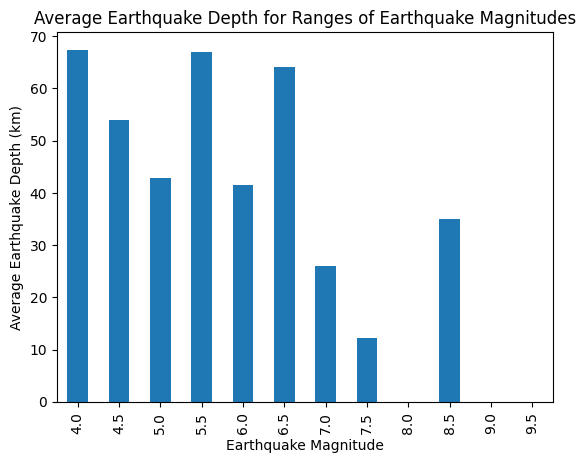

In [28]:
fig,ax = plt.subplots()
mean_depth_binned.T.plot(kind='bar',ax=ax)
ax.set_xlabel('Earthquake Magnitude')
ax.set_ylabel('Average Earthquake Depth (km)')
ax.set_title('Average Earthquake Depth for Ranges of Earthquake Magnitudes')